# EDA (Exploratory Data Analysis) of the dataset

In this notebook, explore the Abalone dataset, by showing relevant visualizations that help understand the problem you are modelling.

Please make sure to write down your conclusions in the final notebook and to remove these intructions.

# Imports

In [ ]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
pd.set_option("display.max_columns", 500)

# Data

In [2]:
df = pd.read_csv("../assets/data/abalone.csv")
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# EDA

In [17]:
# --- set output variable ---

df["Age"] = df["Rings"] + 1.5
df = df.drop(columns="Rings")

In [18]:
# --- basic info ---
n_rows, n_cols = df.shape
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
other_cols = [c for c in df.columns if c not in numeric_cols]

print(f"DataFrame: {n_rows} rows x {n_cols} cols")
print(f"Numeric columns ({len(numeric_cols)}): {numeric_cols}")
print(f"Non-numeric columns ({len(other_cols)}): {other_cols}")

DataFrame: 4177 rows x 9 cols
Numeric columns (8): ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Age']
Non-numeric columns (1): ['Sex']


In [19]:
# --- missing values summary ---
miss_count = df.isnull().sum()
miss_pct = (miss_count / len(df)) * 100
missing_df = pd.DataFrame(
    {"missing_count": miss_count, "missing_pct": miss_pct}
).sort_values("missing_count", ascending=False)

print("Missing values (per column):")
print(missing_df.head(50))

Missing values (per column):
                missing_count  missing_pct
Sex                         0          0.0
Length                      0          0.0
Diameter                    0          0.0
Height                      0          0.0
Whole weight                0          0.0
Shucked weight              0          0.0
Viscera weight              0          0.0
Shell weight                0          0.0
Age                         0          0.0


Correlation matrix (pearson):


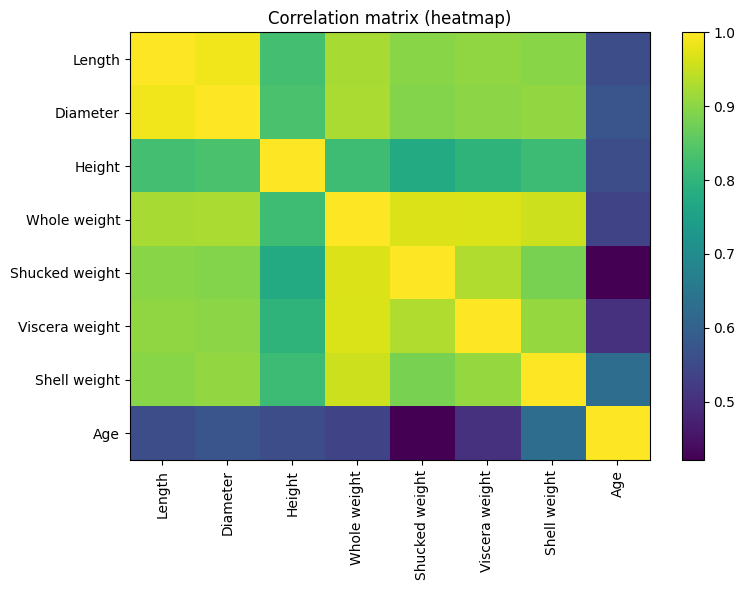

In [20]:
# --- correlation ---
corr = df[numeric_cols].corr()

print("Correlation matrix (pearson):")
plt.figure(figsize=(8, 6))
plt.imshow(corr.values, interpolation="nearest", aspect="auto")
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.index)
plt.title("Correlation matrix (heatmap)")
plt.tight_layout()
plt.show()

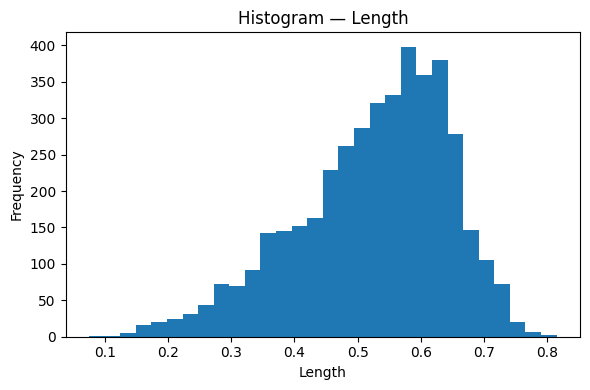

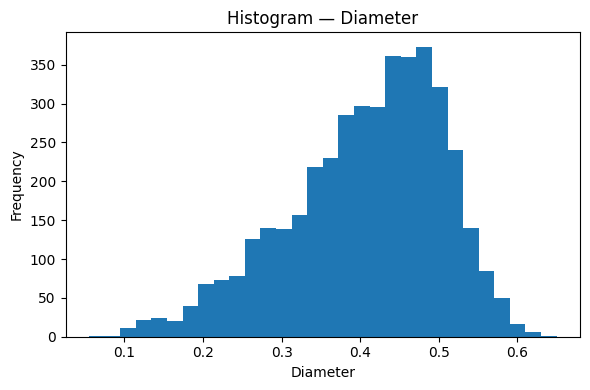

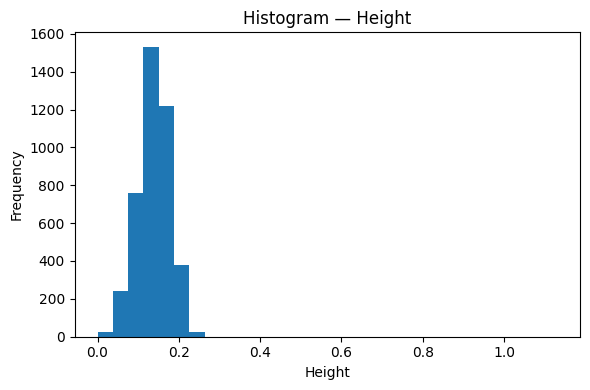

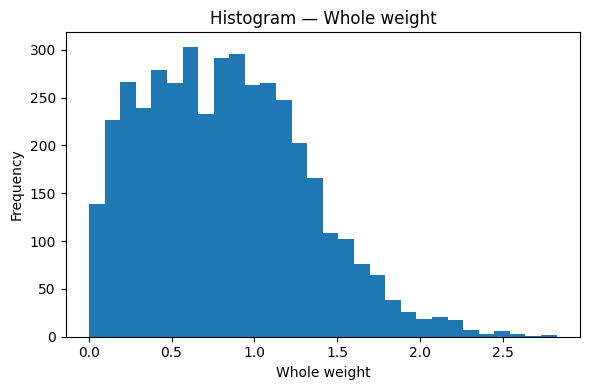

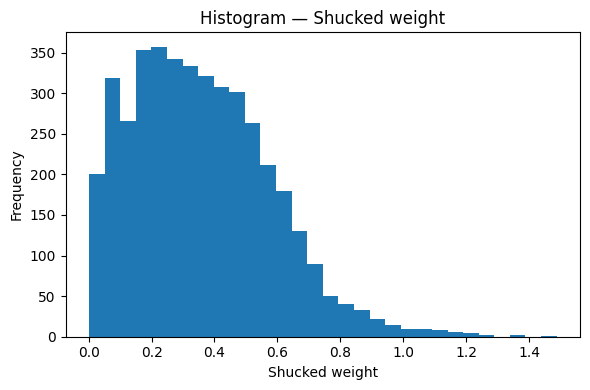

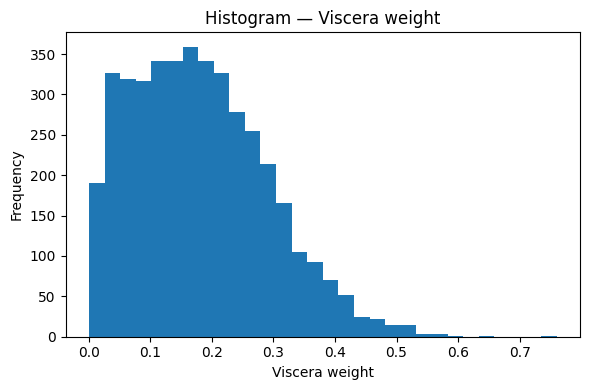

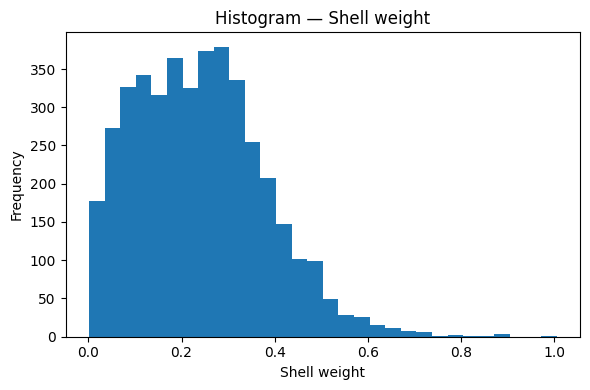

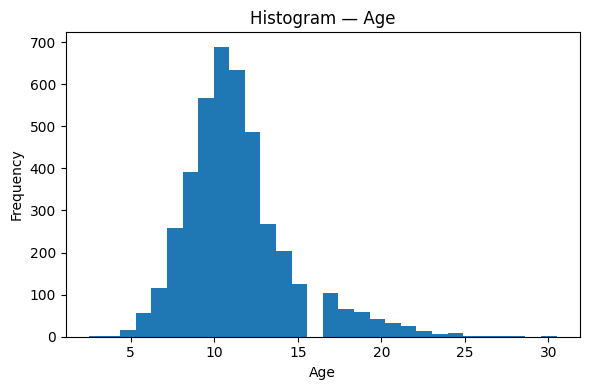

In [21]:
# --- histograms ---
cols_to_plot = numeric_cols
for col in cols_to_plot:
    data = df[col]
    plt.figure(figsize=(6, 4))
    plt.hist(data, bins=30)
    plt.title(f"Histogram — {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

In [24]:
# --- filter outliers ---
numerical_cols = [
    "Length",
    "Diameter",
    "Height",
    "Whole weight",
    "Shucked weight",
    "Viscera weight",
    "Shell weight",
]

df_filtered = df.copy()
for col in numerical_cols:
    Q1 = df_filtered[col].quantile(0.25)
    Q3 = df_filtered[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_filtered = df_filtered[
        (df_filtered[col].isnull())
        | ((df_filtered[col] >= lower_bound) & (df_filtered[col] <= upper_bound))
    ]

print(f"Original shape: {df.shape}")
print(f"After IQR filtering: {df_filtered.shape}")

Original shape: (4177, 9)
After IQR filtering: (4013, 9)
